## Goal: Analyze the correlations between the factors we have created and the anisotropy matrix generated from the polarized spectra 

In [201]:
import os
import json
import helpers

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import importlib
importlib.reload(helpers) 

# Standardizing Plots
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['figure.figsize'] = (10, 6)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'

### Data Exploration

Factor Dictionaries 

In [202]:
#Read in file and turn it into a dataframe
Cr_data_path = "Cr_data/Cr_fd_2_9_2025"
Cu_data_path = "Cu_data/Cu_fd_2_10_2025"
Fe_data_path = "Fe_data/Fe_fd_2_10_2025"

Cr_data_path_r10 = "Cr_data/Cr_fd_2_9_2025"
Cu_data_path_r10 = "Cu_data/Cu_fd_2_10_2025"
Fe_data_path_r10 = "Fe_data/Fe_fd_2_15_2025"

factor_dict_dir_path = Path(Cr_data_path)
os.listdir(factor_dict_dir_path)

['logs',
 'mp-1007974_factor_dict.json',
 'mp-1008280_factor_dict.json',
 'mp-1009079_factor_dict.json',
 'mp-1009485_factor_dict.json',
 'mp-1009592_factor_dict.json',
 'mp-1010071_factor_dict.json',
 'mp-1014993_factor_dict.json',
 'mp-1014995_factor_dict.json',
 'mp-1016059_factor_dict.json',
 'mp-1016225_factor_dict.json',
 'mp-1016300_factor_dict.json',
 'mp-1016625_factor_dict.json',
 'mp-1016653_factor_dict.json',
 'mp-1016677_factor_dict.json',
 'mp-1017080_factor_dict.json',
 'mp-1017099_factor_dict.json',
 'mp-1017197_factor_dict.json',
 'mp-1017317_factor_dict.json',
 'mp-1018066_factor_dict.json',
 'mp-1018079_factor_dict.json',
 'mp-1018082_factor_dict.json',
 'mp-1018161_factor_dict.json',
 'mp-1021275_factor_dict.json',
 'mp-1021301_factor_dict.json',
 'mp-1021379_factor_dict.json',
 'mp-1021695_factor_dict.json',
 'mp-1022627_factor_dict.json',
 'mp-1022971_factor_dict.json',
 'mp-1023158_factor_dict.json',
 'mp-1023188_factor_dict.json',
 'mp-1023490_factor_dict.json',

Explore Factor Dictionary Data

In [203]:
mp_1229 = helpers.print_factor_dict( Cu_data_path + "/mp-1229_factor_dict.json")



Contents of mp-1229_factor_dict.json:
--------------------------------------------------
MP-ID: mp-1229
Material: CuF2
Space Group: P2_1/c
Space Group Number: 14
band_gap: 0.0
density: 4.952617617703766
oxidation_states: {'Cu': 2.0, 'F': -1.0}
dipole moment normalized: [8.535660451714638e-06, 4.5236191103473905e-06, 3.0997231965958216e-06]
normalized dipole anisotropy matrix: [[0.0, 4.012041341367248e-06, 5.435937255118817e-06], [4.012041341367248e-06, 0.0, 1.4238959137515689e-06], [5.435937255118817e-06, 1.4238959137515689e-06, 0.0]]
normalized dipole anisotropy matrix sum: 1.0871874510237634e-05
quadrupole moment normalized: [[-0.13241709940723778, -0.02553036622508032, -0.021003387888786907], [-0.02553036622508032, -0.11949182114457745, 0.034200853183241904], [-0.021003387888786907, 0.034200853183241904, -0.11603103588963395]]
normalized quadrupole anisotropy matrix: [[0.0, 0.012925278262660336, 0.016386063517603827], [0.012925278262660336, 0.0, 0.003460785254943491], [0.0163860635

#### Generate Factor DF

In [204]:
#Cr_factor_df = helpers.generate_factor_df(Cr_data_path, mat_props = True, dipole = True, quadrupole = True)
#Cu_factor_df = helpers.generate_factor_df(Cu_data_path, mat_props = True, dipole = True, quadrupole = True)
#Fe_factor_df = helpers.generate_factor_df(Fe_data_path, mat_props = True, dipole = True, quadrupole = True)

#factor_df = Cr_factor_df
#factor_df = Cu_factor_df
#factor_df = Fe_factor_df


#Cr_factor_df_r10 = helpers.generate_factor_df(Cr_data_path, mat_props = True, dipole = True, quadrupole = True)
#Cu_factor_df_r10 = helpers.generate_factor_df(Cu_data_path, mat_props = True, dipole = True, quadrupole = True)
Fe_factor_df_r10 = helpers.generate_factor_df(Fe_data_path, mat_props = True, dipole = True, quadrupole = True)

#factor_df = Cr_factor_df_r10
#factor_df = Cu_factor_df_r10
factor_df = Fe_factor_df_r10

# Display the DataFrame
print(factor_df.head())
print(factor_df.shape[0])

           Material  Space Group Number  Band Gap   Density  \
MP-ID                                                         
mp-1005         FeP                  62       0.0  6.366076   
mp-1007881      FeB                  63       0.0  6.880705   
mp-1008872   MnFeTe                 216       0.0  7.923663   
mp-1008927   LiFeAs                 107       0.0  6.262964   
mp-1009019      FeN                 221       0.0  6.876640   

                                     Oxidation States          DM Norm 0  \
MP-ID                                                                      
mp-1005                        {'Fe': 3.0, 'P': -3.0}                0.0   
mp-1007881                     {'Fe': 3.0, 'B': -3.0}           0.081327   
mp-1008872  Oxidation states could not be determined.  Could not compute   
mp-1008927         {'Li': 1.0, 'Fe': 2.0, 'As': -3.0}          -0.059961   
mp-1009019                     {'Fe': 3.0, 'N': -3.0}                0.0   

               DM Norm 1 

Anisotropy Matricies 

In [205]:
#Read in file and turn it into a dataframe
#Cr_a_matrix_path = "Cr_data/a_matrix_data/04FEB25anisotropy_data.csv"
#Cu_a_matrix_path = "Cu_data/a_matrix/Cu_05FEB_anisotropy_data.csv"
Fe_a_matrix_path = "Fe_data/a_matrix/Fe_05FEB25_anisotropy_data.csv"

#Cr_spectra_df = helpers.load_anisotropy_matrix(Cr_a_matrix_path, "Cr")
#Cu_spectra_df = load_anisotropy_matrix(Cu_a_matrix_path, "Cu")
Fe_spectra_df = helpers.load_anisotropy_matrix(Fe_a_matrix_path, "Fe")

#spectra_df = Cr_spectra_df
#spectra_df = Cu_spectra_df
spectra_df = Fe_spectra_df

#Check matrix formatting
print(spectra_df.head())
print(spectra_df.shape[0])


            m00           m01           m02           m10  m11           m12  \
Material                                                                       
mp-1005     0.0  1.218130e-01  2.233652e-02  1.218130e-01  0.0  1.441495e-01   
mp-1007881  0.0  1.319032e-02  4.554961e-02  1.319032e-02  0.0  3.235929e-02   
mp-1008872  0.0  9.054075e-07  3.744537e-06  9.054075e-07  0.0  4.649944e-06   
mp-1008927  0.0  3.832251e-03  9.084560e-02  3.832251e-03  0.0  9.467785e-02   
mp-1009019  0.0  5.271004e-08  2.229535e-07  5.271004e-08  0.0  2.756635e-07   

                     m20           m21  m22  
Material                                     
mp-1005     2.233652e-02  1.441495e-01  0.0  
mp-1007881  4.554961e-02  3.235929e-02  0.0  
mp-1008872  3.744537e-06  4.649944e-06  0.0  
mp-1008927  9.084560e-02  9.467785e-02  0.0  
mp-1009019  2.229535e-07  2.756635e-07  0.0  
719


Clean data

In [206]:
factor_df, spectra_df = helpers.align_dataframes(factor_df, spectra_df)

Check the cleaning and alligning

In [207]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("anisotropy_matrix_df")
print(spectra_df.head(5))
print(spectra_df.tail(5))
print(factor_df.shape[0])
print(spectra_df.shape[0])

factor_df
           Material  Space Group Number  Band Gap   Density  \
mp-1005         FeP                  62       0.0  6.366076   
mp-1007881      FeB                  63       0.0  6.880705   
mp-1008927   LiFeAs                 107       0.0  6.262964   
mp-1009019      FeN                 221       0.0  6.876640   
mp-1029659  Ca3FeN3                 176       0.0  3.258548   

                              Oxidation States DM Norm 0     DM Norm 1  \
mp-1005                 {'Fe': 3.0, 'P': -3.0}       0.0  8.919014e-03   
mp-1007881              {'Fe': 3.0, 'B': -3.0}  0.081327  2.081668e-16   
mp-1008927  {'Li': 1.0, 'Fe': 2.0, 'As': -3.0} -0.059961 -6.795649e-02   
mp-1009019              {'Fe': 3.0, 'N': -3.0}       0.0  0.000000e+00   
mp-1029659   {'Ca': 2.0, 'Fe': 3.0, 'N': -3.0}       0.0  4.065129e-07   

               DM Norm 2  Aniso DM 0    Aniso DM 1  ...  Aniso QM 0  \
mp-1005     7.898442e-02         0.0  8.919014e-03  ...         0.0   
mp-1007881 -2.123209e-01

Compute the Normed space group number

In [208]:
factor_df = helpers.compute_normed_spacegroup_number(factor_df)

print(factor_df)

            Material  Space Group Number  Band Gap   Density  \
mp-1005          FeP                  62    0.0000  6.366076   
mp-1007881       FeB                  63    0.0000  6.880705   
mp-1008927    LiFeAs                 107    0.0000  6.262964   
mp-1009019       FeN                 221    0.0000  6.876640   
mp-1029659   Ca3FeN3                 176    0.0000  3.258548   
...              ...                 ...       ...       ...   
mp-864636     CeFeO3                 221    0.0000  6.655837   
mp-866656     GdFeB4                  55    0.0000  7.278421   
mp-881807   Li2VFeO4                  74    0.7825  4.057169   
mp-885434   KLi2FeO3                   9    2.0637  2.925978   
mp-972235    Tb3FeB7                  63    0.0000  8.014929   

                                           Oxidation States DM Norm 0  \
mp-1005                              {'Fe': 3.0, 'P': -3.0}       0.0   
mp-1007881                           {'Fe': 3.0, 'B': -3.0}  0.081327   
mp-1008927  

Compute Normed Spectra Anisotropy Sum

In [209]:
spectra_df = helpers.compute_normed_off_diagonal_sum(spectra_df)

print(spectra_df)


            m00           m01           m02           m10  m11           m12  \
mp-1005     0.0  1.218130e-01  2.233652e-02  1.218130e-01  0.0  1.441495e-01   
mp-1007881  0.0  1.319032e-02  4.554961e-02  1.319032e-02  0.0  3.235929e-02   
mp-1008927  0.0  3.832251e-03  9.084560e-02  3.832251e-03  0.0  9.467785e-02   
mp-1009019  0.0  5.271004e-08  2.229535e-07  5.271004e-08  0.0  2.756635e-07   
mp-1029659  0.0  1.738553e-06  7.877052e-01  1.738553e-06  0.0  7.877070e-01   
...         ...           ...           ...           ...  ...           ...   
mp-864636   0.0  6.262355e-07  2.223147e-06  6.262355e-07  0.0  1.596912e-06   
mp-866656   0.0  4.284174e-02  1.452127e-02  4.284174e-02  0.0  2.832047e-02   
mp-881807   0.0  4.931562e-02  1.352455e-02  4.931562e-02  0.0  6.284017e-02   
mp-885434   0.0  2.028287e-02  2.191903e-01  2.028287e-02  0.0  2.394732e-01   
mp-972235   0.0  8.402970e-02  8.661150e-02  8.402970e-02  0.0  2.581804e-03   

                     m20           m21 

## Analyze correlations using neural network machine learning model


# Set up training and testing 

Let X be the factor ditionary and y be the sum of the off diagonal components of the anisotropy matrix

### Select which X data we want to use

Maybe we could try finding which factors correlate the most using inear model then use those in the neural net

In [210]:
# Define the independent variables (X)

columns_to_use = [
    "Aniso Sum DM",
    "Aniso DM 5",
    "Aniso DM 6",
    "Aniso DM 7",
    "Aniso Sum QM",
    "QM Norm 0",
    "QM Norm 4",
    "QM Norm 8",
    "Aniso QM 5",
    "Aniso QM 6",
    "Aniso QM 7",
    "Band Gap",
    "Density",
    "Normed Spacegroup Number"
]

#X = factor_df
X = factor_df[columns_to_use]

print(X.shape)  


(520, 14)


In [211]:
print(X)
print(X.dtypes)


            Aniso Sum DM    Aniso DM 5    Aniso DM 6 Aniso DM 7  Aniso Sum QM  \
mp-1005     1.579688e-01  7.006541e-02  7.898442e-02   0.070065  1.102733e-01   
mp-1007881  5.872964e-01  2.123209e-01  2.936482e-01   0.212321  2.235313e-01   
mp-1008927  4.757602e-01  2.378801e-01  2.298849e-01    0.23788  9.751621e-02   
mp-1009019  2.775558e-17  1.387779e-17  1.387779e-17        0.0  0.000000e+00   
mp-1029659  8.130258e-07  4.065129e-07  4.722998e-08        0.0  9.007953e-01   
...                  ...           ...           ...        ...           ...   
mp-864636   5.551115e-17  0.000000e+00  2.775558e-17        0.0  1.110223e-16   
mp-866656   1.788178e-02  8.940888e-03  5.191653e-03   0.008941  4.043099e-01   
mp-881807   3.885781e-16  1.942890e-16  1.873501e-16        0.0  7.151085e-02   
mp-885434   3.603726e-02  6.293473e-03  1.172515e-02   0.006293  1.095916e-01   
mp-972235   2.536744e-02  2.260696e-03  1.042303e-02   0.002261  5.533677e-01   

            QM Norm 0  QM N

In [212]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, spectra_df['normed_sum'], test_size=0.2)

In [213]:
print(X_train.head())
print(X_train.dtypes)


            Aniso Sum DM    Aniso DM 5    Aniso DM 6 Aniso DM 7  Aniso Sum QM  \
mp-551451   4.342637e-02  1.361563e-02  2.171319e-02   0.013616      0.298625   
mp-1221277  1.870520e-16  4.148429e-17  5.204170e-17        0.0      0.081448   
mp-757618   9.905025e-02  4.952512e-02  1.190047e-02   0.049525      0.070481   
mp-1218824  4.248599e-04  2.124299e-04  1.731835e-04   0.000212      0.018566   
mp-629397   5.551115e-17  2.775558e-17  0.000000e+00        0.0      0.780327   

            QM Norm 0  QM Norm 4 QM Norm 8  Aniso QM 5  Aniso QM 6  \
mp-551451   -0.201556  -0.244516 -0.095203    0.149313    0.106353   
mp-1221277  -0.158364  -0.199088 -0.170213    0.028875    0.011849   
mp-757618   -0.233029  -0.201457 -0.197788    0.003669    0.035241   
mp-1218824  -0.226845  -0.236128 -0.234323    0.001805    0.007478   
mp-629397   -0.390163  -0.390163      -0.0    0.390163    0.390163   

            Aniso QM 7  Band Gap   Density  Normed Spacegroup Number  
mp-551451     0.14931

In [214]:
y_train.head()

mp-551451     0.394373
mp-1221277    0.465008
mp-757618     0.082977
mp-1218824    0.045638
mp-629397     0.213163
Name: normed_sum, dtype: float64

In [215]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (416, 14)
y_train shape: (416,)


### Visualize the training data

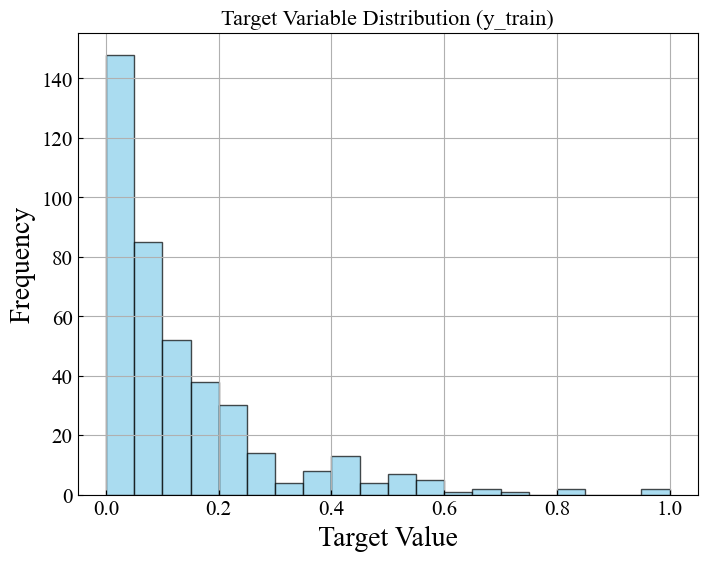

In [216]:
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Target Variable Distribution (y_train)", fontsize=16)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


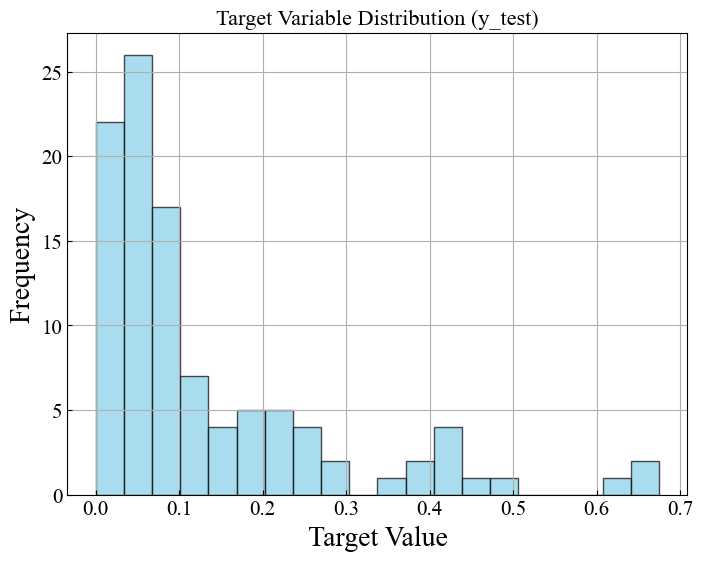

In [217]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Target Variable Distribution (y_test)", fontsize=16)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Import Dependencies

In [218]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [219]:
print(f"X_train passed to model.fit: {X_train.shape}")
print(f"y_train passed to model.fit: {y_train.shape}")


X_train passed to model.fit: (416, 14)
y_train passed to model.fit: (416,)


# Build, Compile, Train and Evaluate Model

In [220]:
# Custom Metric Normalization by Range
def normalized_mean_absolute_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    range_val = tf.reduce_max(y_true) - tf.reduce_min(y_true)
    return mae / (range_val + tf.keras.backend.epsilon())  # Avoid division by zero

def weighted_mse(y_true, y_pred):
    weight = tf.where(y_true < 1.5, 2.0, tf.where(y_true > 2.5, 1.5, 1.0))
    return tf.reduce_mean(weight * tf.square(y_true - y_pred))

# Model Definition
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),  
    BatchNormalization(),
    Dropout(0.3),

    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),

    Dense(1)  # Output layer for regression
])

model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', normalized_mean_absolute_error]  # Track Mean Absolute Error
)

# Train the Model
history = model.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)]
)

c:\Users\John\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\John\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.6075 - mae: 0.4573 - normalized_mean_absolute_error: 0.7524 - val_loss: 0.2734 - val_mae: 0.1149 - val_normalized_mean_absolute_error: 0.1774 - learning_rate: 0.0010
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4708 - mae: 0.3607 - normalized_mean_absolute_error: 0.5984 - val_loss: 0.2544 - val_mae: 0.1187 - val_normalized_mean_absolute_error: 0.1827 - learning_rate: 0.0010
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3940 - mae: 0.3138 - normalized_mean_absolute_error: 0.5197 - val_loss: 0.2477 - val_mae: 0.1337 - val_normalized_mean_absolute_error: 0.2073 - learning_rate: 0.0010
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3369 - mae: 0.2803 - normalized_mean_absolute_error: 0.5668 - val_loss: 0.2203 - val_mae: 0.0989 - val_normalized_mean_absolute_error: 0.1507 - learning_rate: 0.0010
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2920 - mae: 0.2352 - norma

Cross validation model

In [221]:
"""
# Import necessary modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import KFold

# Define number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store performance metrics for each fold
mae_scores = []
mse_scores = []

# Loop through each fold
for train_index, val_index in kf.split(X_train):
    # Ensure proper indexing using .iloc
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Define model inside the loop so it's reinitialized for each fold
    cross_val_model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),  
        BatchNormalization(),
        Dropout(0.3),

        Dense(128),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        Dense(32, activation='relu'),

        Dense(1)  # Output layer for regression
    ])

    cross_val_model.compile(
        optimizer='adam',
        loss='mse',  # Mean Squared Error for regression
        metrics=['mae', normalized_mean_absolute_error]  # Track Mean Absolute Error
    )

    # Train the model on the current fold
    cv_history = cross_val_model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)],
        verbose=0  # Suppress detailed output
    )

    # Evaluate on validation set
    val_loss, val_mae, val_nmae = cross_val_model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Store scores
    mae_scores.append(val_mae)
    mse_scores.append(val_loss)

# Print cross-validation results
print(f"Average MAE across {k} folds: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"Average MSE across {k} folds: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")

"""



'\n# Import necessary modules\nimport numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU\nfrom tensorflow.keras.callbacks import ReduceLROnPlateau\nfrom sklearn.model_selection import KFold\n\n# Define number of folds for cross-validation\nk = 5\nkf = KFold(n_splits=k, shuffle=True, random_state=42)\n\n# Store performance metrics for each fold\nmae_scores = []\nmse_scores = []\n\n# Loop through each fold\nfor train_index, val_index in kf.split(X_train):\n    # Ensure proper indexing using .iloc\n    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]\n    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]\n\n    # Define model inside the loop so it\'s reinitialized for each fold\n    cross_val_model = Sequential([\n        Dense(256, activation=\'relu\', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regu

Evaluate Model

<>:51: SyntaxWarning: invalid escape sequence '\h'
<>:51: SyntaxWarning: invalid escape sequence '\h'
C:\Users\John\AppData\Local\Temp\ipykernel_16700\772359546.py:51: SyntaxWarning: invalid escape sequence '\h'
  ax.set_ylabel("Predicted Output ($\hat{y}$)")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

=== Model Evaluation Metrics ===
Train MSE   : 0.0155
Test MSE    : 0.0130
Train RMSE  : 0.1244
Test RMSE   : 0.1140
Train MAE   : 0.0838
Test MAE    : 0.0843
Train R²    : 0.3966
Test R²     : 0.4052
Train MAPE  : 5293.9070
Test MAPE   : 5223.5050


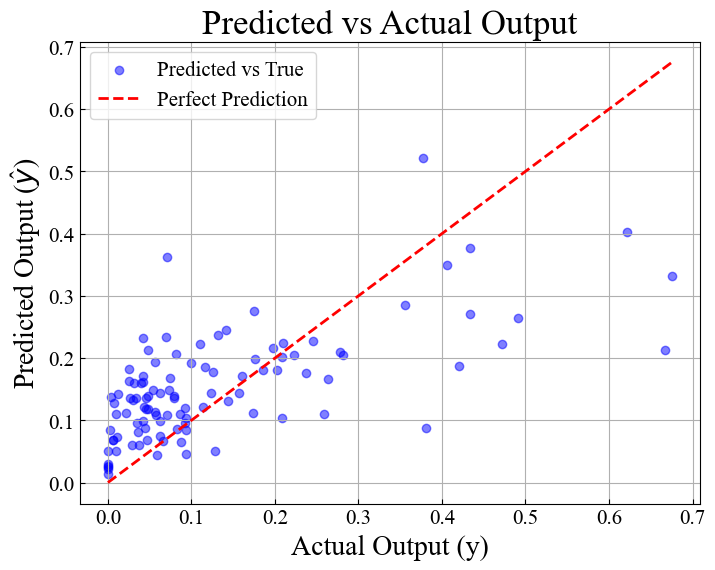

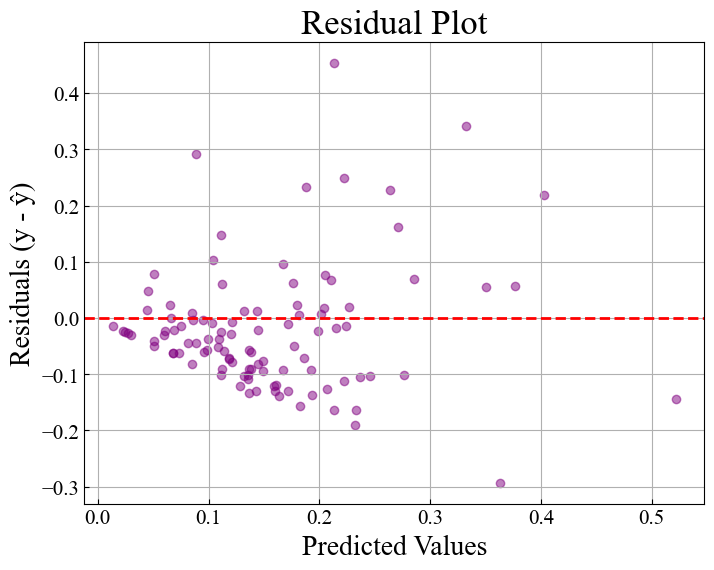

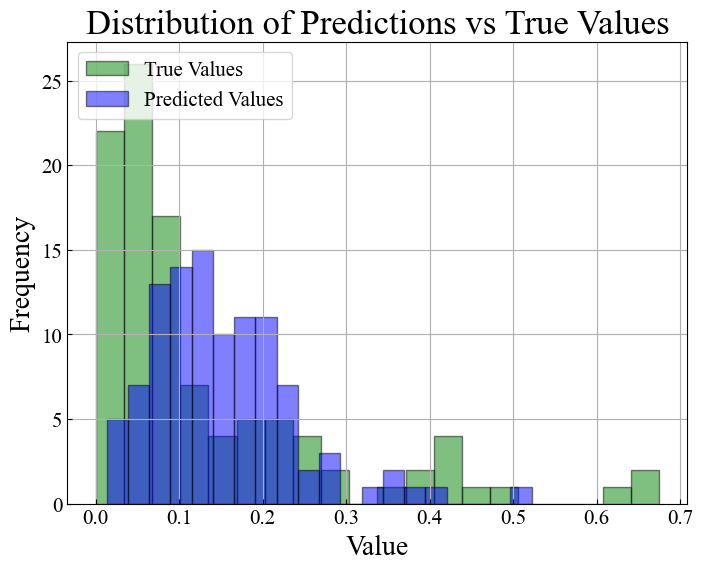

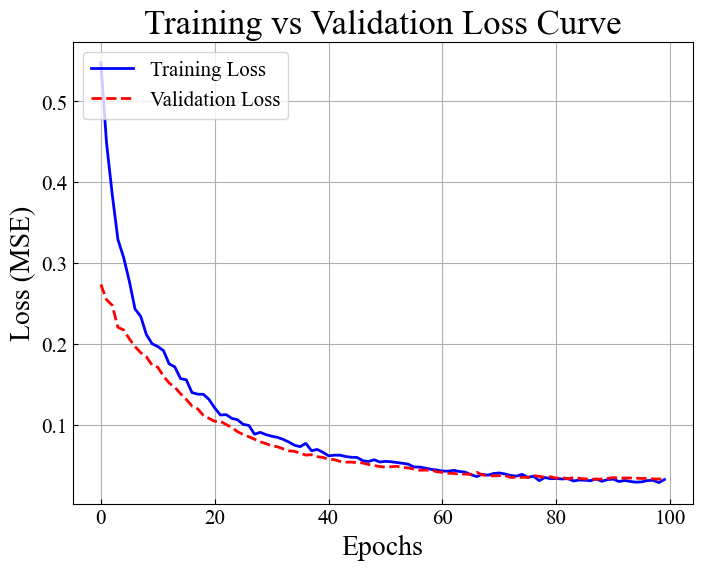

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_model(model, X_train, y_train, X_test, y_test, history):
    """
    Evaluates the model, computes metrics, prints them, and generates plots.

    Args:
        model (tf.keras.Model): Trained model
        X_train (np.array): Training data features
        y_train (np.array): Training data labels
        X_test (np.array): Test data features
        y_test (np.array): Test data labels
        history (tf.keras.callbacks.History): Training history

    Returns:
        dict: Computed evaluation metrics
        dict: Dictionary of generated plot figures
    """

    # Get predictions
    y_train_pred = model.predict(X_train).flatten()
    y_test_pred = model.predict(X_test).flatten()

    # Compute metrics
    metrics = {
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Train MAPE": mean_absolute_percentage_error(y_train, y_train_pred),
        "Test MAPE": mean_absolute_percentage_error(y_test, y_test_pred),
    }

    # Print metrics in a structured format
    print("\n=== Model Evaluation Metrics ===")
    for metric, value in metrics.items():
        print(f"{metric:<12}: {value:.4f}")

    # === Generate Plots (Stored in Dictionary) ===
    plots = {}

    # Predicted vs Actual Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(y_test, y_test_pred, alpha=0.5, label="Predicted vs True", color="blue")
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
    ax.set_xlabel("Actual Output (y)")
    ax.set_ylabel("Predicted Output ($\hat{y}$)")
    ax.set_title("Predicted vs Actual Output")
    ax.legend()
    ax.grid(True)
    plots["predicted_vs_actual"] = fig
    plt.show()

    # Residual Plot
    residuals = y_test - y_test_pred
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(y_test_pred, residuals, alpha=0.5, color="purple")
    ax.axhline(y=0, color="red", linestyle="--")
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals (y - ŷ)")
    ax.set_title("Residual Plot")
    ax.grid(True)
    plots["residual_plot"] = fig
    plt.show()

    # Prediction Distribution Histogram
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(y_test, bins=20, alpha=0.5, label="True Values", color="green", edgecolor="black")
    ax.hist(y_test_pred, bins=20, alpha=0.5, label="Predicted Values", color="blue", edgecolor="black")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.set_title("Distribution of Predictions vs True Values")
    ax.legend()
    ax.grid(True)
    plots["prediction_distribution"] = fig
    plt.show()

    # Learning Curves
    history_dict = history.history
    if "loss" in history_dict and "val_loss" in history_dict:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(history_dict["loss"], label="Training Loss", color="blue")
        ax.plot(history_dict["val_loss"], label="Validation Loss", color="red", linestyle="--")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Loss (MSE)")
        ax.set_title("Training vs Validation Loss Curve")
        ax.legend()
        ax.grid(True)
        plots["learning_curve"] = fig
        plt.show()

    return metrics, plots

metrics, plots = evaluate_model(model, X_train, y_train, X_test, y_test, history)
cv_metrics, cv_plots = evaluate_model(cross_val_model, X_train, y_train, X_test, y_test, cv_history)


Save Model and Metrics

In [223]:

def save_model(model, metrics, plots, base_output_dir, model_name):
    """
    Saves the trained model, evaluation metrics, and plots into a unique folder inside a main directory.

    Args:
        model (tf.keras.Model): Trained model
        metrics (dict): Computed evaluation metrics
        plots (dict): Dictionary of plot figures
        base_output_dir (str): Main directory where the model folder will be created
        model_name (str): Name for the model folder (used for filenames too)
    """
    # Create a unique directory inside base_output_dir
    model_output_dir = helpers.get_unique_output_folder(os.path.join(base_output_dir, model_name))

    # Save metrics to JSON
    metrics_path = os.path.join(model_output_dir, "metrics.json")
    with open(metrics_path, "w") as f:
        json.dump(metrics, f, indent=4)
    print(f"Metrics saved to {metrics_path}")

    # Save plots
    for plot_name, fig in plots.items():
        plot_path = os.path.join(model_output_dir, f"{plot_name}.png")
        fig.savefig(plot_path)
        plt.close(fig)  # Close figure to free memory
    print(f"Plots saved in {model_output_dir}")

    # Save trained model in the recommended `.keras` format
    model_path = os.path.join(model_output_dir, f"{model_name}.keras")
    model.save(model_path)
    print(f"Model saved to {model_path} (Keras native format)")

# Save everything to a folder
#save_model(model, metrics, plots, "ML_model_outputs", "Fe_2_13_2025")

### Predictions against training

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


<>:10: SyntaxWarning: invalid escape sequence '\h'
<>:10: SyntaxWarning: invalid escape sequence '\h'
C:\Users\John\AppData\Local\Temp\ipykernel_16700\3763415805.py:10: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Predicted Output ($\hat{y}_{train}$)", fontsize=14)


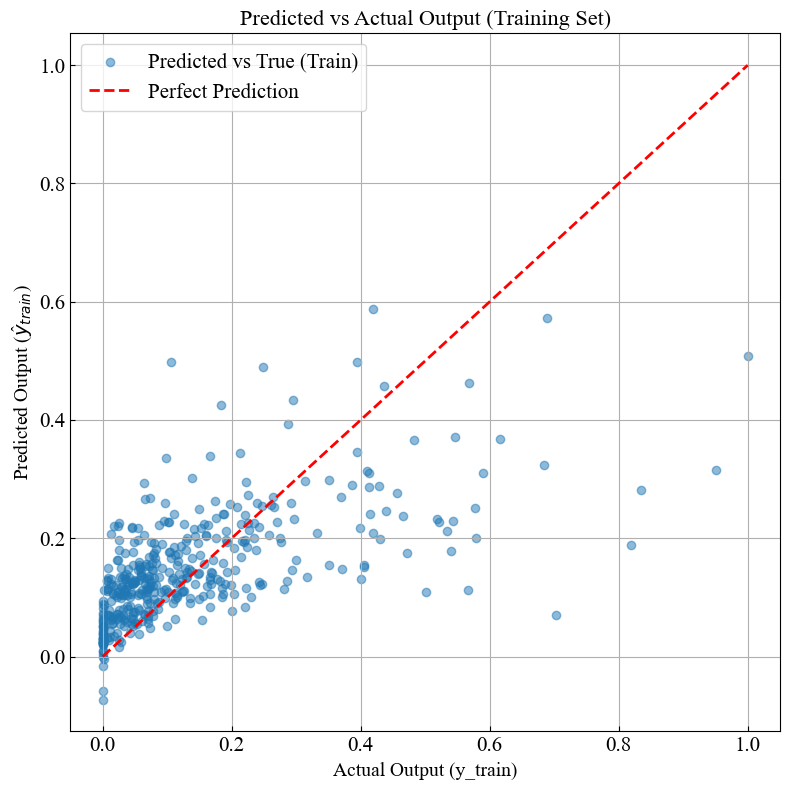

In [224]:
# Get predictions for the training set
y_train_pred = model.predict(X_train)
y_train_pred = y_train_pred.flatten()  # Convert to shape (n_samples,)

# Scatter plot of predicted vs true values (training set)
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, alpha=0.5, label="Predicted vs True (Train)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Output (y_train)", fontsize=14)
plt.ylabel("Predicted Output ($\hat{y}_{train}$)", fontsize=14)
plt.title("Predicted vs Actual Output (Training Set)", fontsize=16)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
